In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '../data/10- average-length-of-stay.csv'
data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  2894 non-null   object 
 1   Code                    2894 non-null   object 
 2   Year                    2894 non-null   int64  
 3   Average length of stay  2894 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 90.6+ KB


In [4]:
data.head()

,Entity,Code,Year,Average length of stay
0,Albania,ALB,2018,2.43
1,Albania,ALB,2019,2.58
2,Albania,ALB,2020,2.34
3,Albania,ALB,2021,2.60
4,Algeria,DZA,2000,3.02


In [5]:
data.tail()

,Entity,Code,Year,Average length of stay
2889,Zimbabwe,ZWE,2017,3.0
2890,Zimbabwe,ZWE,2018,3.0
2891,Zimbabwe,ZWE,2019,3.0
2892,Zimbabwe,ZWE,2020,3.0
2893,Zimbabwe,ZWE,2021,3.0


In [6]:
data.isnull().sum()

Entity                    0
Code                      0
Year                      0
Average length of stay    0
dtype: int64

### Data Preprocessing and Cleaning

In [10]:
# Checking for duplications and removing if any 
duplicates = data.duplicated().sum()
print(duplicates)

0


In [13]:
# Descriptive Statistics
descriptive_stats = data['Average length of stay'].describe()
print(descriptive_stats)

count    2894.000000
mean        4.459173
std         3.272503
min         0.600000
25%         2.200000
50%         3.085000
75%         6.270000
max        23.000000
Name: Average length of stay, dtype: float64


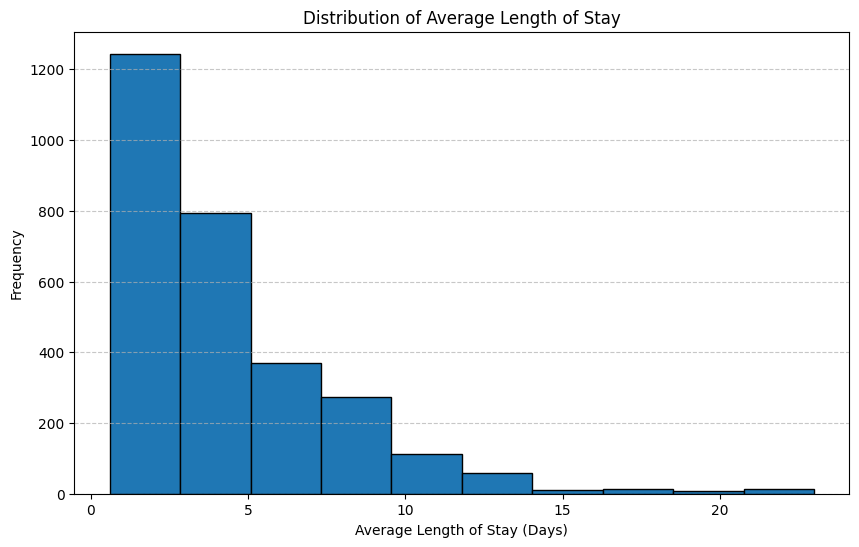

In [14]:
# Plotting the distibution of 'Average length of stay'
plt.figure(figsize=(10,6))
plt.hist(data['Average length of stay'], bins=10, edgecolor='black')
plt.title('Distribution of Average Length of Stay')
plt.xlabel('Average Length of Stay (Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Description: the distribution of the average length of stay
1. **Skewed Distribution**: The histogram is right-skewed, with most of the data concentrated at lower values (below 5 days). This indicates that the majority of stays are relatively short.
2. **Frequency Peaks**: There is a significant peak around the lowest range (0-5 days), suggesting that short stays dominate the dataset.
3. **Outliers or Extended Stays**: A few data points exceed 10 or even 20 days, representing rare cases of significantly longer stays.

The chart effectively highlights that most stays fall within a narrow range, but there are occasional longer durations that influence the tail of the distribution.



In [17]:
# Year-Wise Analysis
yearly_avg = data.groupby('Year')['Average length of stay'].mean().reset_index()

In [18]:
# Country-wise Analysis: Average stay per country
country_avg = data.groupby('Entity')['Average length of stay'].mean().reset_index()

In [20]:
country_avg

,Entity,Average length of stay
0,Albania,2.487500
1,Algeria,2.271111
2,Andorra,2.846522
3,Angola,4.000000
4,Argentina,2.390000
...,...,...
163,Vanuatu,8.166667
164,Venezuela,13.684706
165,Vietnam,3.491111
166,Zambia,4.562500


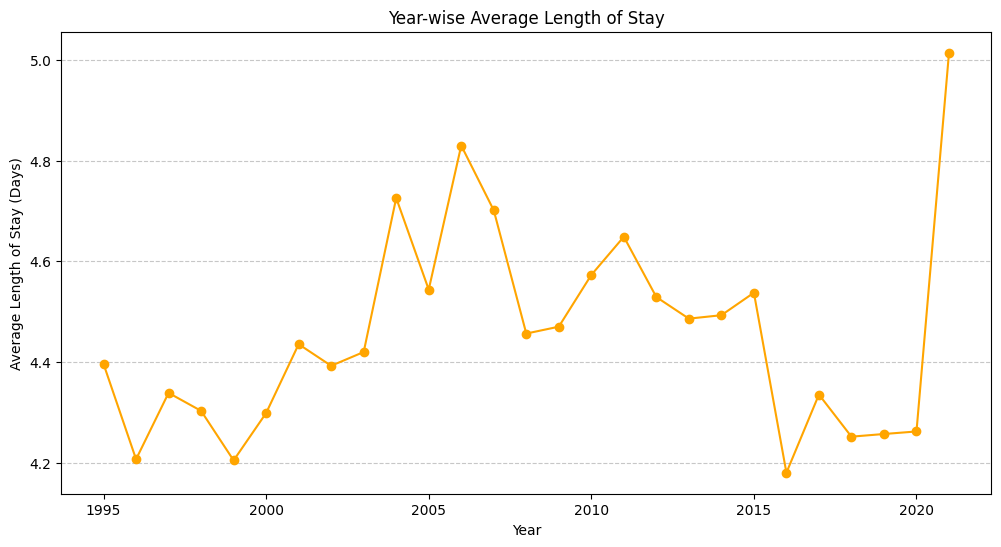

In [24]:
# Plotting Year-wise trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['Year'], yearly_avg['Average length of stay'], marker='o', color='orange')
plt.title('Year-wise Average Length of Stay')
plt.xlabel('Year')
plt.ylabel('Average Length of Stay (Days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Description

**Overall Trend**:
The average length of stay fluctuates over time.
There is a notable increase towards the end of the timeline, where the value peaks sharply.

**Period of Stability**:
Between certain periods (e.g., late 1990s and 2010s), there are intervals of relative stability with minor fluctuations.

**Sudden Changes**:
Sharp peaks and drops indicate years with significant deviations, likely due to external factors such as policy changes, global events, or anomalies in the data.

**Final Spike**:
The steep upward spike in the final year suggests an outlier or a recent change that dramatically increased the average stay duration. It could be the result of end of Pandemic in year 2021. 

In [30]:
# Plotting Country-wise average stay
# sort the countries based on length of stay
sorted_langth_of_stay = data.sort_values(by='Average length of stay', ascending=False)

# Top countries
top_countries = sorted_langth_of_stay.head(10)
bottom_countries = sorted_langth_of_stay.tail(10)
middle_index = len(sorted_langth_of_stay) // 2
middle_countires = sorted_langth_of_stay.iloc[middle_index-5:middle_index+5]


visualization_data = pd.concat([top_countries, middle_countires, bottom_countries])

/var/folders/n9/v4jfbhx154l3n6tpqmvtm2bc0000gn/T/ipykernel_2676/3263447705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average length of stay', y='Entity', data=visualization_data, palette='viridis')


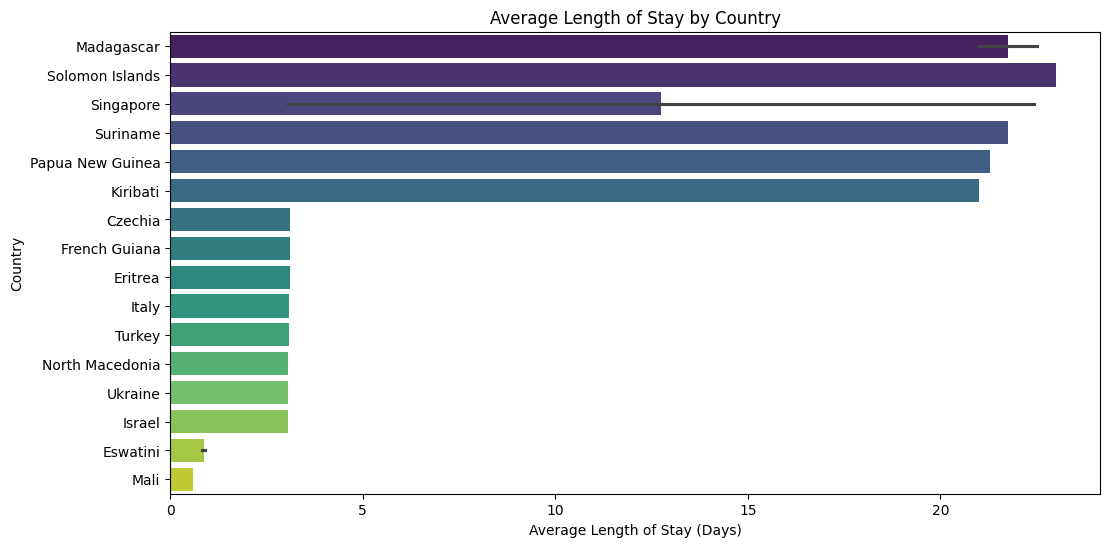

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Average length of stay', y='Entity', data=visualization_data, palette='viridis')
plt.title('Average Length of Stay by Country')
plt.xlabel('Average Length of Stay (Days)')
plt.ylabel('Country')
plt.show()

In [32]:
heatmap_data = visualization_data.pivot_table(
    index='Entity', columns='Year', values='Average length of stay', aggfunc='mean'
)


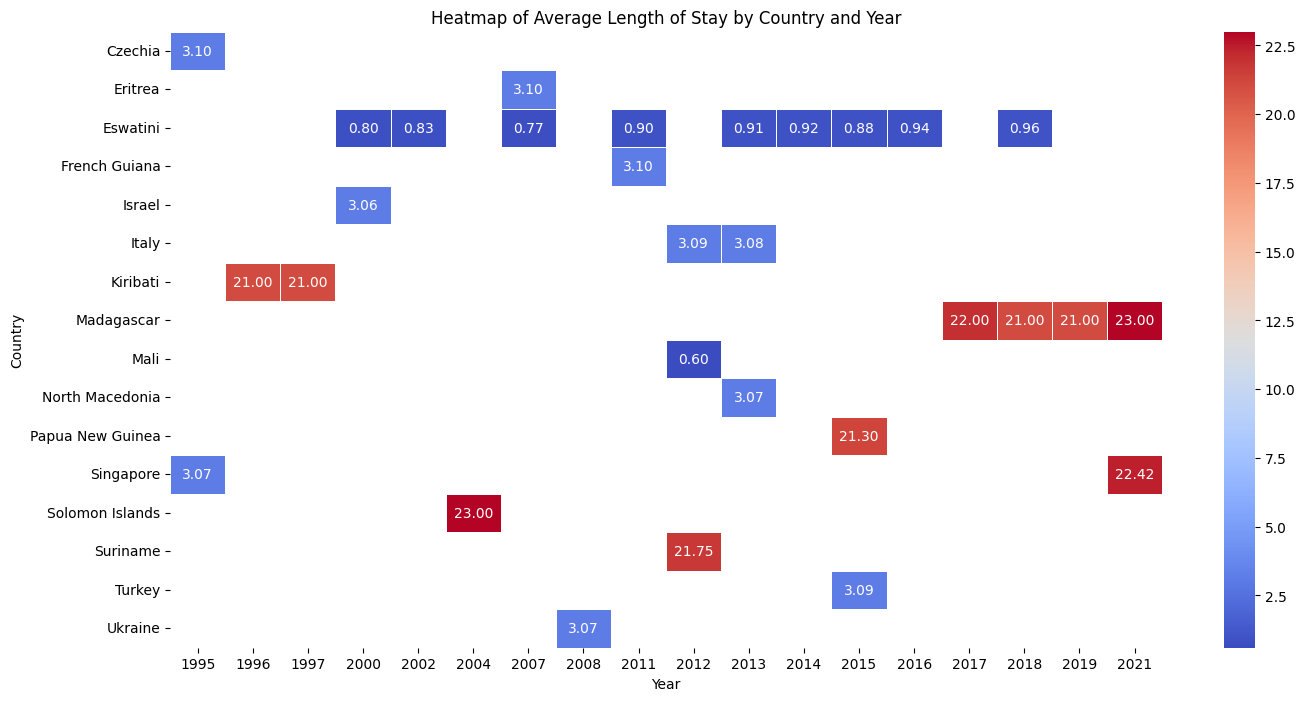

In [33]:
# Heatmap for Country-Year Interaction
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Average Length of Stay by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()
